## The point of this analysis is to see how Lebrons game has changed, how he has continued to be so dominant in the league.

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
mpl.rcParams['figure.figsize'] = [11, 5]

In [3]:
df = pd.read_csv("Lebron Data.csv")
df_s = df.head(18)
df_career = df.iloc[18]
df_teams = df.tail(3)

## Effectively we have split the given data. 
# $$ df \_s : \text{General annual seasons performance}  $$
# $$ df \_ career : \text{The given career averages or totals} $$
# $$ df \_ teams : \text{Given team averages or totals} $$

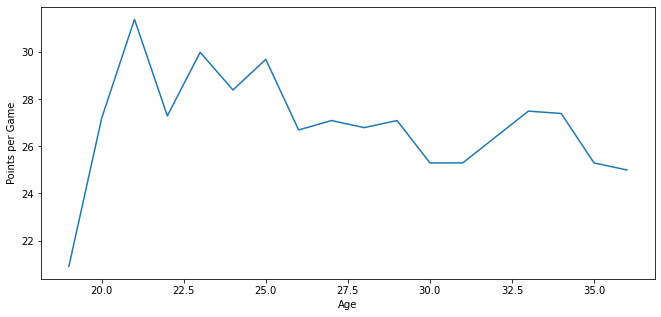

In [30]:
plt.xlabel("Age")
plt.ylabel("Points per Game")
plt.plot(df_s["Age"], df_s['PTS'])

## Looking at Lebrons points, we can see that he peaked at over 30 points per game and then he slowly tapered off. So far, he still remains at around 25 points per game. What we are used to seeing is him dominate through the paint trucking past everyone. But as you get older, you'd expect him to be less explosive and not able to muscle his way through traffic. So our analysis will work around how Lebron has changed his game over the years.

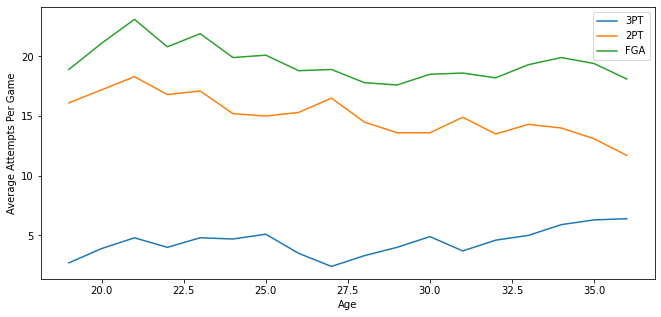

In [31]:
plt.xlabel("Age")
plt.ylabel("Average Attempts Per Game")
plt.plot(df_s["Age"], df_s['3PA'], label="3PT")
plt.plot(df_s["Age"], df_s["2PA"], label="2PT")
plt.plot(df_s["Age"], df_s['FGA'], label="FGA")
plt.legend()

## As you can see just from a viewing perspective, Lebrons 3's attempts are steadily increasing, while his 2PT attempts are steadily decreasing. Now he's still taking a good amount of attempts, but you'd think that having so much success in the paint he'd stay there. What we are seeing now is Lebron starting to work around the perimeter more and more. 

## Now working with this current data, I want to hypothesize that LBJ takes less than 25% of his shots from beyond the arc overall including all of his season.
# Null hypothesis: $$ 3PT \geq 0.25 * FGA$$
# Alternate Hypothesis: $$3PT <0.25 * FGA$$
## With $$\alpha = 0.05 $$

In [6]:
avg_FGA = df_s["FGA"].mean()
avg_3PA = df_s["3PA"].mean()
n = df_s["Season"].count() 
s = np.std(df_s['3PA'])
f"Our average Field Goal Attempts are {avg_FGA.round(2)} and Lebrons average 3 point attempts are {avg_3PA.round(2)}"

'Our average Field Goal Attempts are 19.49 and Lebrons average 3 point attempts are 4.44'

In [7]:
f"Total number of samples is {n}"

'Total number of samples is 18'

In [8]:
t = (avg_3PA - (0.25 * avg_FGA))/(s / np.sqrt(n))
z_score = scipy.stats.norm.cdf(t, loc=0, scale=1)

In [9]:
f"Our calculated test statistic is {t}, locating the value on a Normal Distribution we find {z_score} to be our z_score"

'Our calculated test statistic is -1.6720761812358669, locating the value on a Normal Distribution we find 0.047254650394456005 to be our z_score'

# Given that the test statistics is less then 0.05, we can declare that with 5% confidence Lebron's overall career 3 point attempts is less then 25% of total field goal attempts. 

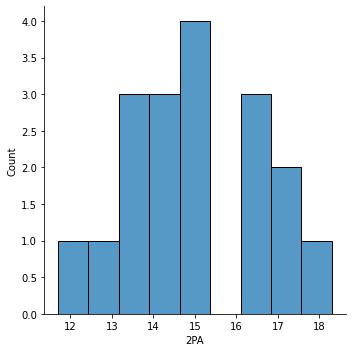

In [55]:
sns.displot(df_s['2PA'], bins=9)

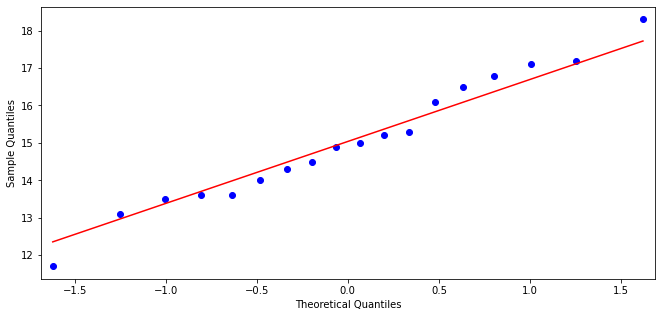

In [58]:
qqplot(df_s["2PA"], line='s')
plt.show()

## Placing the 2 point field goal attempts in a normal distribution, we can see that there is a peak within the center very similar to a bell shape. Now this is kind of weird, but reading up on Lebron's start, he was actually a perimeter player who liked to get teammates involved first. As he got older and developed further, he started to use his size to his advantage to make assist from the post, but that also means he also had to score from the post as well. Considering he came into the league at 240lbs, peaked up at 280lbs he definitely increased his capability to dominate in the paint. 
## Kobe himself described Lebron's game in the video below @ 1:00
# https://www.youtube.com/watch?v=PGxETnTnZaQ&t=105s

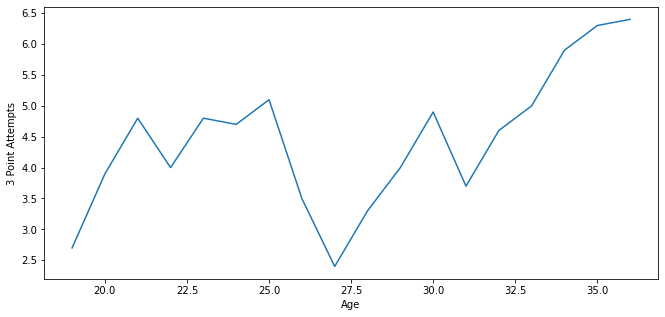

In [33]:
age = df_s["Age"].values.reshape(-1,1)
y = df_s["3PA"]
model = LinearRegression().fit(age, y)
plt.xlabel("Age")
plt.ylabel("3 Point Attempts")
plt.plot(age, y)
#print(model.intercept_)
#print(model.coef_)
#print(model.coef_ * 35 + model.intercept_)

# Therefore the linear regression formula is:
## $$ 3PA = Age * 0.120536 + 1.129687$$

## We can tell just from the plot above of Age vs 3PA, a linear plot isn't exactly ideal considering Lebrons evolution as a player.
## Therefore we will try another method.

In [56]:
df_s["2PA"]

0     16.1
1     17.2
2     18.3
3     16.8
4     17.1
5     15.2
6     15.0
7     15.3
8     16.5
9     14.5
10    13.6
11    13.6
12    14.9
13    13.5
14    14.3
15    14.0
16    13.1
17    11.7
Name: 2PA, dtype: float64

In [36]:
df.iloc[:, 3]

0     NBA
1     NBA
2     NBA
3     NBA
4     NBA
5     NBA
6     NBA
7     NBA
8     NBA
9     NBA
10    NBA
11    NBA
12    NBA
13    NBA
14    NBA
15    NBA
16    NBA
17    NBA
18    NBA
19    NaN
20    NBA
21    NBA
22    NBA
Name: Lg, dtype: object